<a href="https://colab.research.google.com/github/AmritaNeogi/practice_repo/blob/main/K_Prototypes_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Necessary Libs

In [ ]:
!pip -q install numpy pandas matplotlib gower scikit-learn scipy seaborn kmodes plotly dash dash-bootstrap-components


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.5 MB/s eta 0:00:00


Creating a dummy dataset to work with

In [ ]:
### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score


data = {
    'Age': [25, 26, 24, 23, 45, 46, 44, 43, 35, 36, 34, 33, 50, 51, 49, 48, 29, 30, 28, 27, 40, 41, 39, 38, 31, 32, 37, 42, 47, 22],
    'Income': [50000, 51000, 49000, 48000, 75000, 76000, 74000, 73000, 60000, 61000, 59000, 58000, 80000, 81000, 79000, 78000, 52000, 53000, 51000, 50000, 70000, 71000, 69000, 68000, 55000, 56000, 65000, 72000, 77000, 47000],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male'],
    'Loyalty_Level': ['Low', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'High', 'High', 'Low'],
    'Preferred_Product': ['Electronics', 'Electronics', 'Electronics', 'Electronics', 'Groceries', 'Groceries', 'Groceries', 'Groceries', 'Clothing', 'Clothing', 'Clothing', 'Clothing', 'Groceries', 'Groceries', 'Groceries', 'Groceries', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Clothing', 'Clothing', 'Clothing', 'Clothing', 'Electronics', 'Electronics', 'Clothing', 'Groceries', 'Groceries', 'Electronics']
}
# Create a DataFrame
dataset = pd.DataFrame(data)

df = dataset.copy()

df.head()

,Age,Income,Gender,Loyalty_Level,Preferred_Product
0,25,50000,Male,Low,Electronics
1,26,51000,Male,Low,Electronics
2,24,49000,Male,Low,Electronics
3,23,48000,Male,Low,Electronics
4,45,75000,Female,High,Groceries


Preprocessing the Data

1. Ordinal Encoding the Loyalty_Level column

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [['Low','Medium','High']])
df['Loyalty_Level'] = oe.fit_transform(df[['Loyalty_Level']])
df.head()

,Age,Income,Gender,Loyalty_Level,Preferred_Product
0,25,50000,Male,0.0,Electronics
1,26,51000,Male,0.0,Electronics
2,24,49000,Male,0.0,Electronics
3,23,48000,Male,0.0,Electronics
4,45,75000,Female,2.0,Groceries


2. MinMax Scaling the Numerical columns Age and Income

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['Age','Income']

scaler = MinMaxScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,Age,Income,Gender,Loyalty_Level,Preferred_Product
0,0.103448,0.088235,Male,0.0,Electronics
1,0.137931,0.117647,Male,0.0,Electronics
2,0.068966,0.058824,Male,0.0,Electronics
3,0.034483,0.029412,Male,0.0,Electronics
4,0.793103,0.823529,Female,2.0,Groceries


Clustering

In [ ]:
# Convert the data into array
data = df.to_numpy()

# Specify the categorical features index
categorical_features_idx = [2, 4]

Getting Optimal Clusters for K-Prototypes using Elbow Method

In [ ]:
# Choosing for 2,3,4,5,6,7 clusters

cost = []

# For 2 clusters
kproto = KPrototypes(n_clusters = 2, init='Huang')
kproto.fit_predict(data, categorical=categorical_features_idx)
cost.append(kproto.cost_)

# For 3 clusters
kproto = KPrototypes(n_clusters = 3, init='Huang')
kproto.fit_predict(data, categorical=categorical_features_idx)
cost.append(kproto.cost_)


# For 4 clusters
kproto = KPrototypes(n_clusters = 4, init='Huang')
kproto.fit_predict(data, categorical=categorical_features_idx)
cost.append(kproto.cost_)

# For 5 clusters
kproto = KPrototypes(n_clusters = 5, init='Huang',)
kproto.fit_predict(data, categorical=categorical_features_idx)


# For 6 clusters
kproto = KPrototypes(n_clusters = 6, init='Huang')
kproto.fit_predict(data, categorical=categorical_features_idx)
cost.append(kproto.cost_)


The cost for a cluster is the sum of all dissimilarities (numerical,categorical) within that cluster.

And then, total cost for say k = 3 is the sum of cost for all 3 clusters. Similar to WCSS thing for K-Means but treating categorical and numerical dissimilarities separately and adding them up

In [ ]:
cost

[12.061264767825994,
 4.035687106007218,
 2.6830294844592135,
 1.3347549421680804,
 0.1461444331527114]

Visualizing the Cost variation with K Clusters - Elbow Method

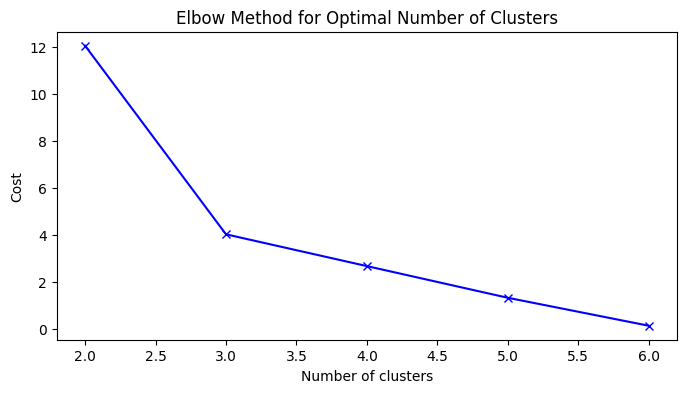

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot([2,3,4,5,6], cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


Clearly, we can see that at K = 3 we have a significant elbow so we can say that there are optimal clusters in the data

In [ ]:
kproto = KPrototypes(n_clusters = 3, init='Huang')
kproto.fit_predict(data, categorical=categorical_features_idx)


array([1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 2, 2, 1], dtype=uint16)

In [ ]:
df['cluster'] = kproto.labels_

In [ ]:
df.head()

,Age,Income,Gender,Loyalty_Level,Preferred_Product,cluster
0,0.103448,0.088235,Male,0.0,Electronics,1
1,0.137931,0.117647,Male,0.0,Electronics,1
2,0.068966,0.058824,Male,0.0,Electronics,1
3,0.034483,0.029412,Male,0.0,Electronics,1
4,0.793103,0.823529,Female,2.0,Groceries,2


In [ ]:
df[['Age','Income']] = scaler.inverse_transform(df[['Age','Income']])

In [ ]:
df.head()

,Age,Income,Gender,Loyalty_Level,Preferred_Product,cluster
0,25.0,50000.0,Male,0.0,Electronics,1
1,26.0,51000.0,Male,0.0,Electronics,1
2,24.0,49000.0,Male,0.0,Electronics,1
3,23.0,48000.0,Male,0.0,Electronics,1
4,45.0,75000.0,Female,2.0,Groceries,2


A little Cluster Analysis to get a feel for our clusters and develop a storyline around them

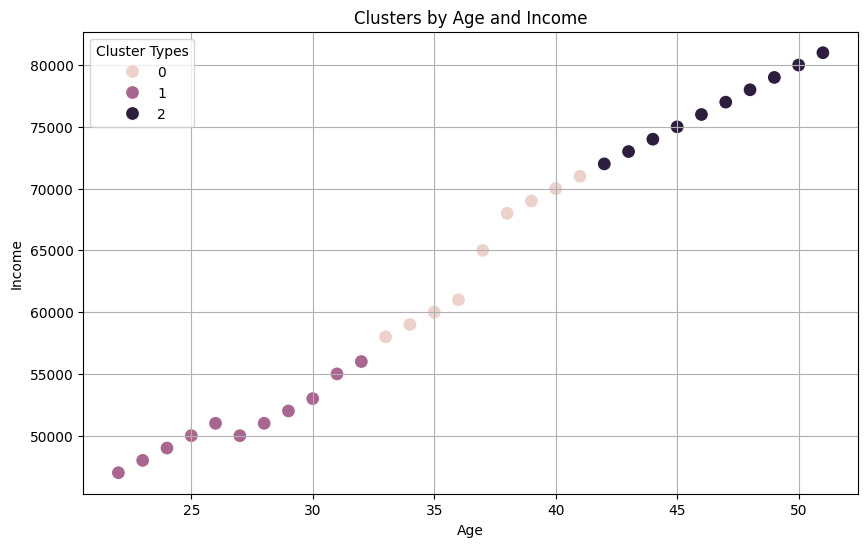

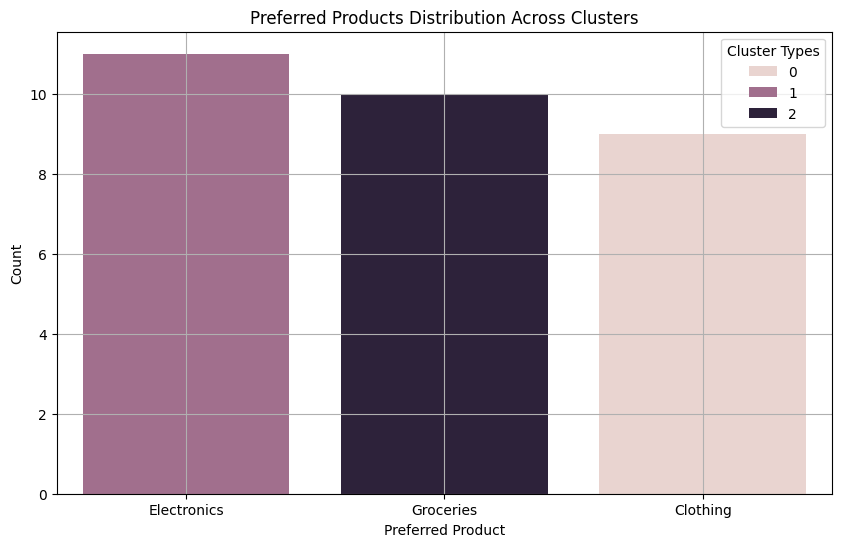

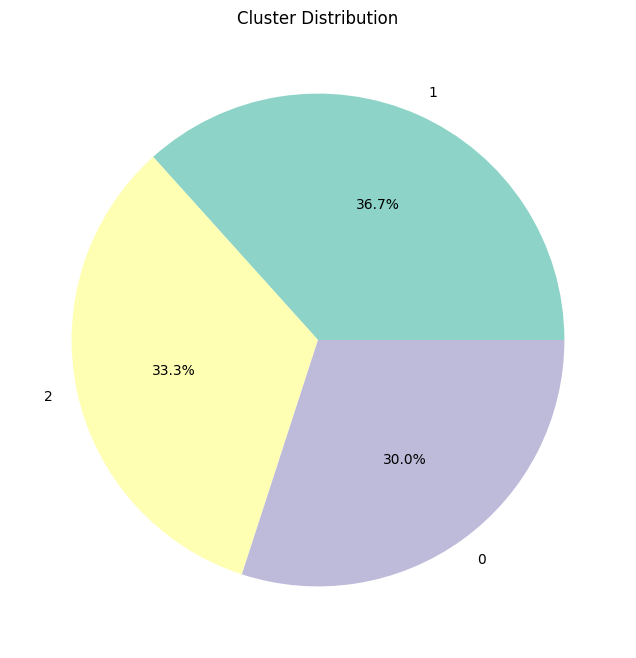

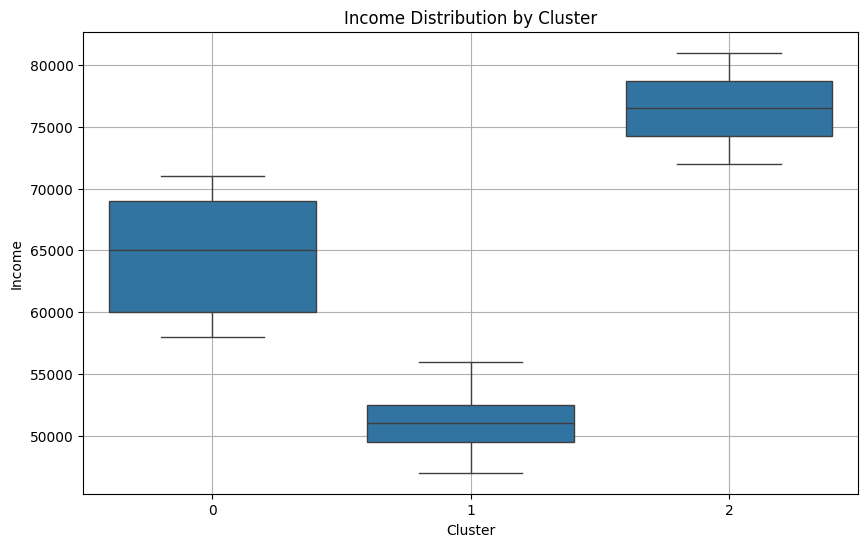


Cluster Storylines:
Cluster:0 

- Average Age: 37.00
- Average Income: 64555.56
- Most Preferred Product: Clothing
- Gender Distribution: {'Male': 0.5555555555555556, 'Female': 0.4444444444444444}

Cluster:1 

- Average Age: 27.00
- Average Income: 51090.91
- Most Preferred Product: Electronics
- Gender Distribution: {'Female': 0.5454545454545454, 'Male': 0.45454545454545453}

Cluster:2 

- Average Age: 46.50
- Average Income: 76500.00
- Most Preferred Product: Groceries
- Gender Distribution: {'Female': 0.5, 'Male': 0.5}



In [ ]:
# Cluster labels for storytelling

# Scatter Plot: Age vs. Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Income', hue='cluster', s=100)
plt.title('Clusters by Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster Types')
plt.grid(True)
plt.show()

# Bar Chart: Preferred Products by Cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Preferred_Product', hue='cluster')
plt.title('Preferred Products Distribution Across Clusters')
plt.xlabel('Preferred Product')
plt.ylabel('Count')
plt.legend(title='Cluster Types')
plt.grid(True)
plt.show()

# Pie Chart: Cluster Distribution
cluster_distribution = df['cluster'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cluster_distribution, labels=cluster_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Cluster Distribution')
plt.show()

# Box Plot: Income by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cluster', y='Income')
plt.title('Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.grid(True)
plt.show()

### Step 5: Storylines for Clusters

print("\nCluster Storylines:")
for cluster in [0,1,2]:
    cluster_data = df[df['cluster'] == cluster]
    print(f"Cluster:{cluster} \n")
    print(f"- Average Age: {cluster_data['Age'].mean():.2f}")
    print(f"- Average Income: {cluster_data['Income'].mean():.2f}")
    print(f"- Most Preferred Product: {cluster_data['Preferred_Product'].mode()[0]}")
    print(f"- Gender Distribution: {cluster_data['Gender'].value_counts(normalize=True).to_dict()}\n")

And we can attach a gamma value to the categorical features to adjust the relative importance of numerical and categorical features

In [ ]:
kproto = KPrototypes(n_clusters = 3, init='Huang',gamma = 2.0)
kproto.fit_predict(data, categorical=categorical_features_idx)